## Collaborative coding using GitHub
### *COLLABORATOR 1*
*Pol Torné Charlez*

----------------------------------------------------------------

### IMPORTING LIBRARIES

Let's start by importing the required libraries...

In [2]:
%pip install seaborn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from itertools import *
from collections import Counter, OrderedDict
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

<class 'ModuleNotFoundError'>: No module named 'seaborn'

----------------------------------------------------------------

### TASK 1

##### HEADING
*Function renamevars (df, dict_names)
Rename variables on a given dataframe df. The function returns a df who’s columns
names are as detailed in dict_names
Inputs:
df: a given data frame
dict_names: a dictionary for mapping the actual names of the columns in the dataframe
(each key of the dictionary) to a given new simpler name (i.e. the values of
the dictionary). You can follow the example in the notebook
numpy_pandas_sklearn.ipynb for the Lab 4.
Output:
renamed_df: returns the input dataframe but with the columns renamed as in
dict_names*

Next, we are loading the parkinson's data, as specified in the task's heading.

In [4]:
df = pd.read_csv('parkinsons.data', 
                 dtype = { # indicate categorical variables
                     'status': 'category'})
df.head(5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


We are also using the same dictionary for name simplification as in L4. For as to check whether or not the order of the rows matters or not when it comes to the column name replacement, the first column's case has been moved out of the dictionary's first position. The outcome of this small test confirms that the order is not considered in the name replacement, instead, the most important thing is that keys in the dictionary match the dataframe's columns names, otherwise the replacement won't be successful.

In [5]:
dict_names = {'MDVP:Fhi(Hz)':'maxFF', 
              'MDVP:Flo(Hz)':'minFF',
              'MDVP:Jitter(%)': 'percJitter',
              'MDVP:Jitter(Abs)':'absJitter' ,
              'MDVP:RAP': 'rap',
              'MDVP:PPQ': 'ppq',
              'Jitter:DDP': 'ddp',
              'MDVP:Shimmer' : 'lShimer',
              'MDVP:Shimmer(dB)': 'dbShimer',
              'Shimmer:APQ3':'apq3',
              'Shimmer:APQ5': 'apq5',
              'MDVP:APQ':'apq',
              'MDVP:Fo(Hz)':'avFF',
              'Shimmer:DDA':'dda'}

Below is the definition of the first required function of this task, regarding the inputs, both a dataframe and a dictionary with the column names' replacements are set, as the output, a dataframe called renamed_df is created.

In [6]:
def renamevars(df, dict_names):
    df.rename(columns = dict_names, inplace = True)
    renamed_df = df
    return renamed_df

In [7]:
renamed_df = renamevars(df, dict_names)
renamed_df.head(10)

,name,avFF,maxFF,minFF,percJitter,absJitter,rap,ppq,ddp,lShimer,...,dda,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


----------------------------------------------------------------

### TASK 2

##### HEADING
*Summarize the data after cleaning (that is, after removing some correlations) when the
data is ready. Annotate your observations. For example, how many observations do you
have? Are there apparent differences between controls and patients? Is the variability
comparable? If you check the minimum and maximum values are there outliers? If so,
what will you do with them?*

For this section, an initial cleaning of the data is required, it is specified to remove some correlations among the data. For that, we must check the linear correlation between each pair of columns, and we have done so through the definition of the following functions. 

- First, calculate_correlation() has as input a dataframe, from which will calculate and output a correlation matrix containing the linear correlation coefficients for each pair of columns. This is possible thanks to the itertools function product, and the corr() function. Before obtaining the correlation matrix, only the columns of the dataframe containing numeric values (and the ones that at least have a value, or in other words, the ones that aren't filled with NANs) are kept.

- Second, plot_scatter() is a function that will ease the procedure of representing the scatter plots between pairs of columns, and has as inputs the dataframe, the two columns to be represented, and the correlation value between the pair of columns, to be given in the plot's title.

- Third, visualize_high_correlation() has as inputs a correlation matrix (which will be obtained through the function calculate_correlation) and a threshold, and only those coefficients of the matrix surpassing that threshold will be kept. Then, for each coefficient kept, the plot_scatter function is called for the pair of columns that gave such coefficient, and the plot is provided. This function ultimately returns a series of plots and the list of all the pairs with a correlation coefficient above the threshold. Notice that each pair of columns can be found twice in the correlation matrix, therefore, the code selects only one of the two instances to be represented and kept in the list.

In [130]:
def calculate_correlation(df):
    # Select numerical columns only
    numerical_df = df.select_dtypes(include='number')

    # Drop columns with all NaN values
    numerical_df = numerical_df.dropna(axis=1, how='all')

    # Create an empty DataFrame to store correlation coefficients
    correlation_df = pd.DataFrame(index=numerical_df.columns, columns=numerical_df.columns)

    # Calculate correlation coefficients including self-correlation
    for col1, col2 in product(numerical_df.columns, repeat=2):
        correlation_coefficient = numerical_df[col1].corr(numerical_df[col2])
        correlation_df.loc[col1, col2] = correlation_coefficient

    return correlation_df

def plot_scatter(df, col1, col2, corr):
    plt.scatter(df[col1], df[col2], color = 'firebrick')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title(f'Corr {corr} of: {col1} vs {col2}')
    plt.show()

def visualize_high_correlation(correlation_df, threshold, graph):
    high_corr_pairs = []

    for col1 in correlation_df.columns:
        for col2 in correlation_df.index:
            correlation_coefficient = correlation_df.loc[col1, col2]
            if abs(correlation_coefficient) > threshold and col1 != col2 and ((col1, col2) not in high_corr_pairs and (col2, col1) not in high_corr_pairs): # Only adding those instances that havn't been already introduced, but in a different column order
                high_corr_pairs.append((col1, col2))
                if graph:
                    plot_scatter(df, col1, col2, correlation_coefficient)

    return high_corr_pairs

Obtaining the correlation matrix...

In [101]:
correlation_df = calculate_correlation(renamed_df)
correlation_df.head()

,avFF,maxFF,minFF,percJitter,absJitter,rap,ppq,ddp,lShimer,dbShimer,...,apq,dda,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
avFF,1.0,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.077774,-0.094732,-0.021981,0.059144,-0.383894,-0.446013,-0.413738,-0.24945,0.17798,-0.372356
maxFF,0.400985,1.0,0.084951,0.102086,-0.029198,0.097177,0.091126,0.09715,0.002281,0.043465,...,0.004937,-0.003733,0.163766,-0.024893,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
minFF,0.596546,0.084951,1.0,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.107293,-0.150737,-0.10867,0.210851,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
percJitter,-0.118003,0.102086,-0.139919,1.0,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.758255,0.746635,0.906959,-0.728165,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
absJitter,-0.382027,-0.029198,-0.277815,0.935714,1.0,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.648793,0.69717,0.834972,-0.65681,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162


For as to establish a threshold regarding the correlation coefficient, a histogram is provided. Through this representation we can see the most abundant coefficient, and do the cut above it, therefore we wil be excluding the correlations in the highest percentile of the data, and we will not damage the its value.

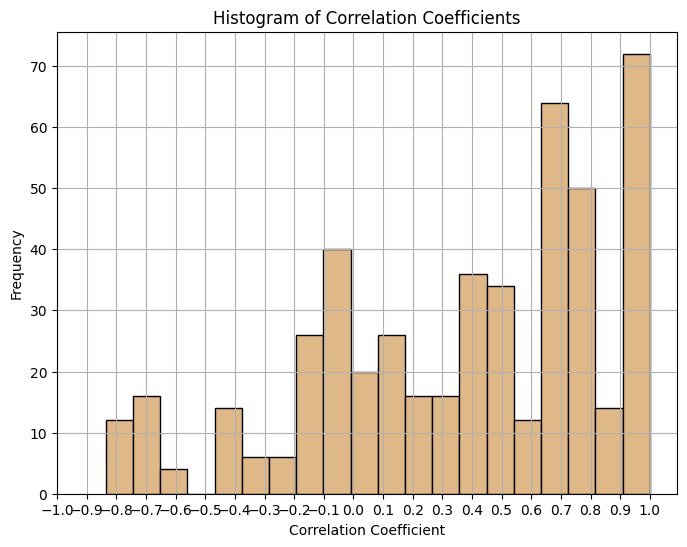

In [102]:
plt.figure(figsize=(8, 6))
plt.hist(correlation_df.values.flatten(), bins=20, color='burlywood', edgecolor='black')
plt.title('Histogram of Correlation Coefficients')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Frequency')
plt.grid(True)
plt.xticks(np.arange(-1, 1.1, 0.1))  # Adjust the range and step based on your data
plt.show()

If we put the threshold at 0.7, then the amount of pairs found is really high and removing one of them will lead to a lack of value in the data, that is why the threshold is set to 0.8 instead. Proceeding like this, will enable us to mantain the richness of the data and get rid of the highest correlating instances. Below there are representations for each of the unique pairs found in our dataset, that provide a correlation coefficient above the set threshold.

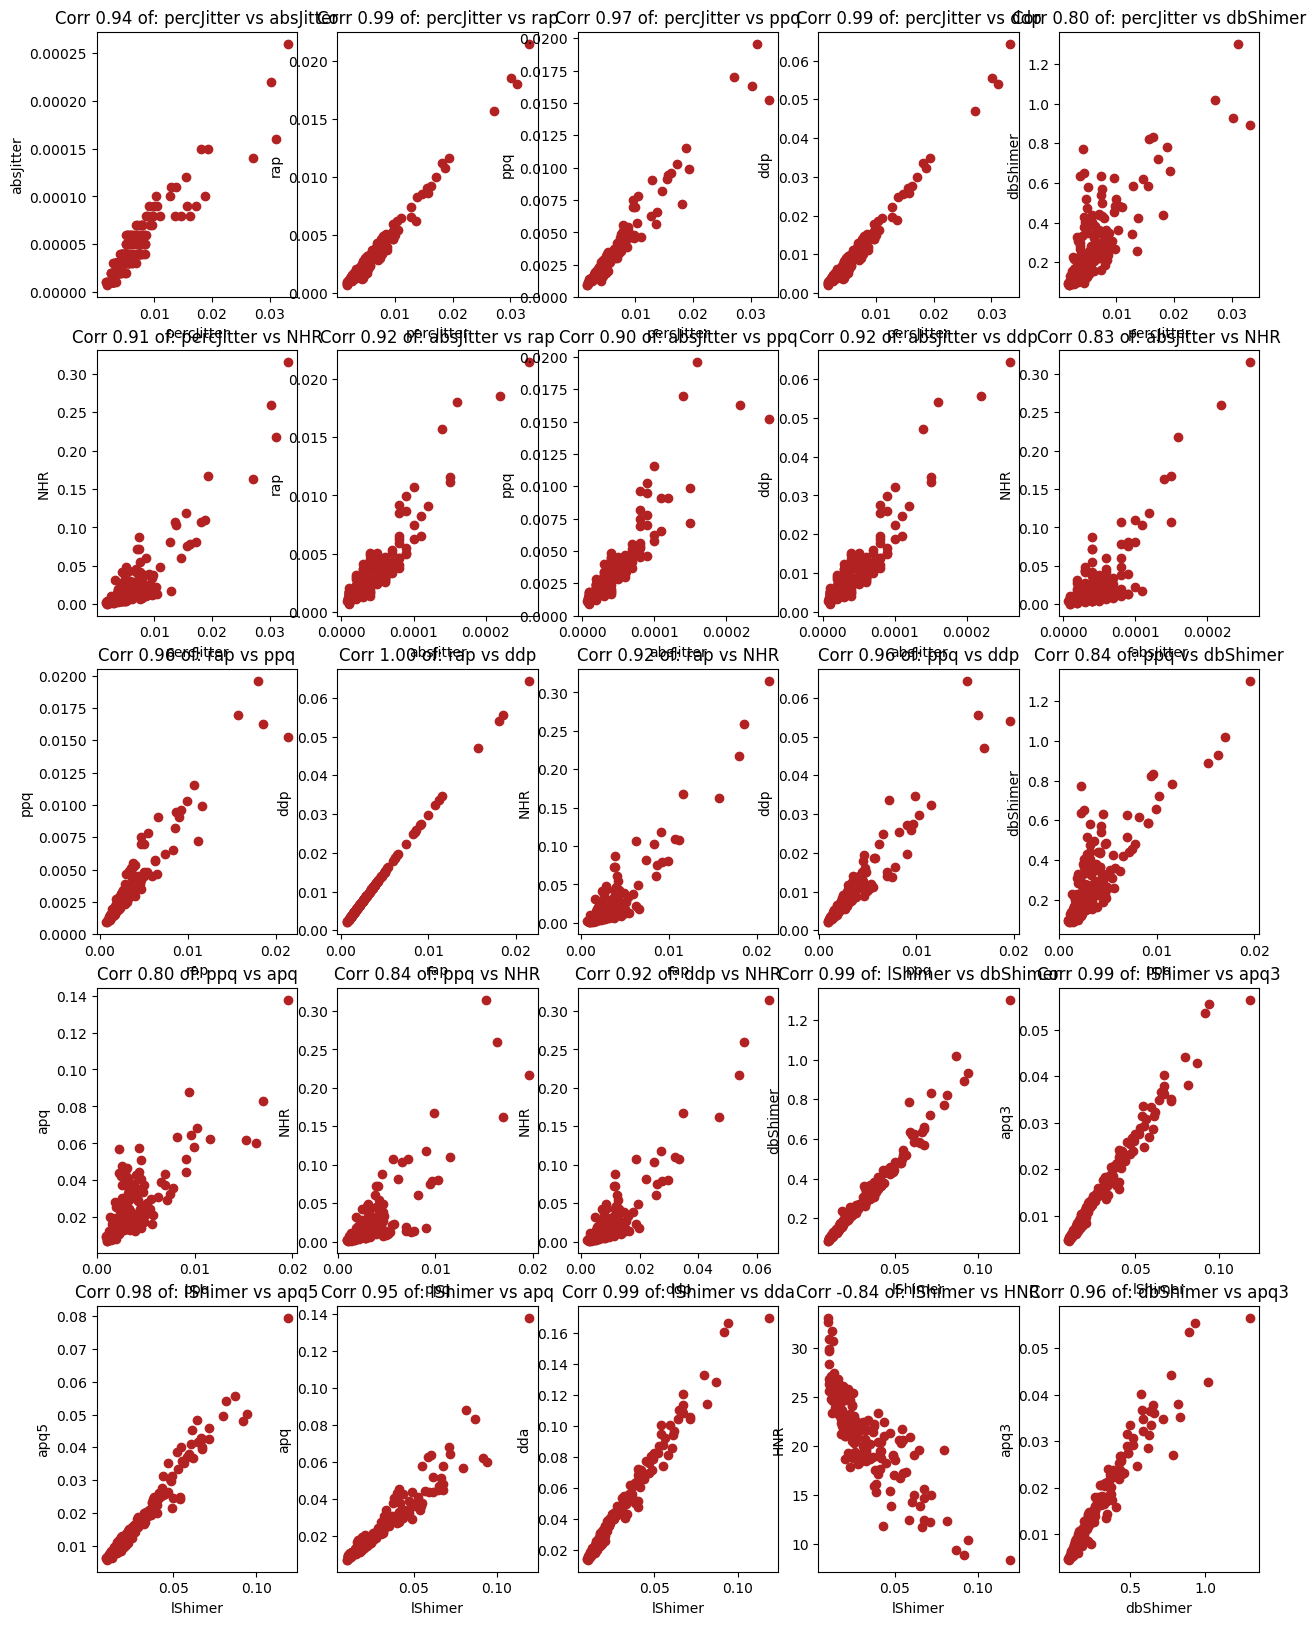

<class 'IndexError'>: index 5 is out of bounds for axis 0 with size 5

In [131]:
high_corr_pairs = visualize_high_correlation(correlation_df, 0.8, True)

In [12]:
high_corr_pairs

[('percJitter', 'absJitter'),
 ('percJitter', 'rap'),
 ('percJitter', 'ppq'),
 ('percJitter', 'ddp'),
 ('percJitter', 'dbShimer'),
 ('percJitter', 'NHR'),
 ('absJitter', 'rap'),
 ('absJitter', 'ppq'),
 ('absJitter', 'ddp'),
 ('absJitter', 'NHR'),
 ('rap', 'ppq'),
 ('rap', 'ddp'),
 ('rap', 'NHR'),
 ('ppq', 'ddp'),
 ('ppq', 'dbShimer'),
 ('ppq', 'apq'),
 ('ppq', 'NHR'),
 ('ddp', 'NHR'),
 ('lShimer', 'dbShimer'),
 ('lShimer', 'apq3'),
 ('lShimer', 'apq5'),
 ('lShimer', 'apq'),
 ('lShimer', 'dda'),
 ('lShimer', 'HNR'),
 ('dbShimer', 'apq3'),
 ('dbShimer', 'apq5'),
 ('dbShimer', 'apq'),
 ('dbShimer', 'dda'),
 ('dbShimer', 'HNR'),
 ('apq3', 'apq5'),
 ('apq3', 'apq'),
 ('apq3', 'dda'),
 ('apq3', 'HNR'),
 ('apq5', 'apq'),
 ('apq5', 'dda'),
 ('apq5', 'HNR'),
 ('apq', 'dda'),
 ('apq', 'HNR'),
 ('dda', 'HNR'),
 ('spread1', 'PPE')]

With this information, we can detect which pairs are producing various high correlating cases and that therefore, should be erased to provide the desired dataframe settings. To have a better look at the data, we will count how many times does each variable provide a high correlating pair.

In [13]:
high_corr_pairss = [item for pair in high_corr_pairs for item in pair]
high_corr_pairss = Counter(high_corr_pairss)
print('High correlating pairs, and their count:')
print(high_corr_pairss)

sorted_pairs = dict(sorted(high_corr_pairss.items(), key=lambda item: item[1], reverse=True)) # We are sorting the dictionary again because, although apparently it looked ordered, it wasn't
keys = list(sorted_pairs.keys())
print('\nUnique keys:')
print(keys)

High correlating pairs, and their count:
Counter({'dbShimer': 8, 'ppq': 7, 'apq': 7, 'percJitter': 6, 'lShimer': 6, 'apq3': 6, 'apq5': 6, 'dda': 6, 'HNR': 6, 'absJitter': 5, 'rap': 5, 'ddp': 5, 'NHR': 5, 'spread1': 1, 'PPE': 1})

Unique keys:
['dbShimer', 'ppq', 'apq', 'percJitter', 'lShimer', 'apq3', 'apq5', 'dda', 'HNR', 'absJitter', 'rap', 'ddp', 'NHR', 'spread1', 'PPE']


Now, we will be repeating the procedure above, and erase in each iteration the most occurent variable, until the length of the list of variables that provide a high correlating pair is zero. Proceeding like this will allow us to erase the smallest number of variables possible.

In [14]:
dff = renamed_df

while len(keys) != 0:
    print(keys)
    instance = keys[0]
    
    dff = dff.drop(columns = instance)
    corr_df = calculate_correlation(dff)
    high_corr_pairss = visualize_high_correlation(corr_df, 0.8, False)
    high_corr_pairss = [item for pair in high_corr_pairss for item in pair]
    high_corr_pairss = Counter(high_corr_pairss)  
    
    sorted_pairs = dict(sorted(high_corr_pairss.items(), key=lambda item: item[1], reverse=True))
    keys = list(sorted_pairs.keys())

dff.head()    

['dbShimer', 'ppq', 'apq', 'percJitter', 'lShimer', 'apq3', 'apq5', 'dda', 'HNR', 'absJitter', 'rap', 'ddp', 'NHR', 'spread1', 'PPE']
['ppq', 'apq', 'percJitter', 'absJitter', 'rap', 'ddp', 'NHR', 'lShimer', 'apq3', 'apq5', 'dda', 'HNR', 'spread1', 'PPE']
['lShimer', 'apq3', 'apq5', 'apq', 'dda', 'HNR', 'percJitter', 'absJitter', 'rap', 'ddp', 'NHR', 'spread1', 'PPE']
['percJitter', 'absJitter', 'rap', 'ddp', 'NHR', 'apq3', 'apq5', 'apq', 'dda', 'HNR', 'spread1', 'PPE']
['apq3', 'apq5', 'apq', 'dda', 'HNR', 'absJitter', 'rap', 'ddp', 'NHR', 'spread1', 'PPE']
['absJitter', 'rap', 'ddp', 'NHR', 'apq5', 'apq', 'dda', 'HNR', 'spread1', 'PPE']
['apq5', 'apq', 'dda', 'HNR', 'rap', 'ddp', 'NHR', 'spread1', 'PPE']
['rap', 'ddp', 'NHR', 'apq', 'dda', 'HNR', 'spread1', 'PPE']
['apq', 'dda', 'HNR', 'ddp', 'NHR', 'spread1', 'PPE']
['ddp', 'NHR', 'dda', 'HNR', 'spread1', 'PPE']
['dda', 'HNR', 'spread1', 'PPE']
['spread1', 'PPE']


,name,avFF,maxFF,minFF,NHR,HNR,status,RPDE,DFA,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.02211,21.033,1,0.414783,0.815285,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.01929,19.085,1,0.458359,0.819521,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01309,20.651,1,0.429895,0.825288,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.01353,20.644,1,0.434969,0.819235,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01767,19.649,1,0.417356,0.823484,0.234513,2.332180,0.410335


With the data clean from correlations, now we head off to do some analysis.

1. Number of observations

In [15]:
print('Number of observations: ',dff.shape[0])

Number of observations:  195


2. Are there differences between controls and patients?

In [16]:
healthy = dff[dff['status']=='0']
pd = dff[dff['status']=='1']
print('Number of healthy: ',healthy.shape[0])
print('Number of patients: ',pd.shape[0])

Number of healthy:  48
Number of patients:  147


Below, boxplots for each variable against the status of the subjects are provided. Differences can be found in each scenario, although not in a bold way. 

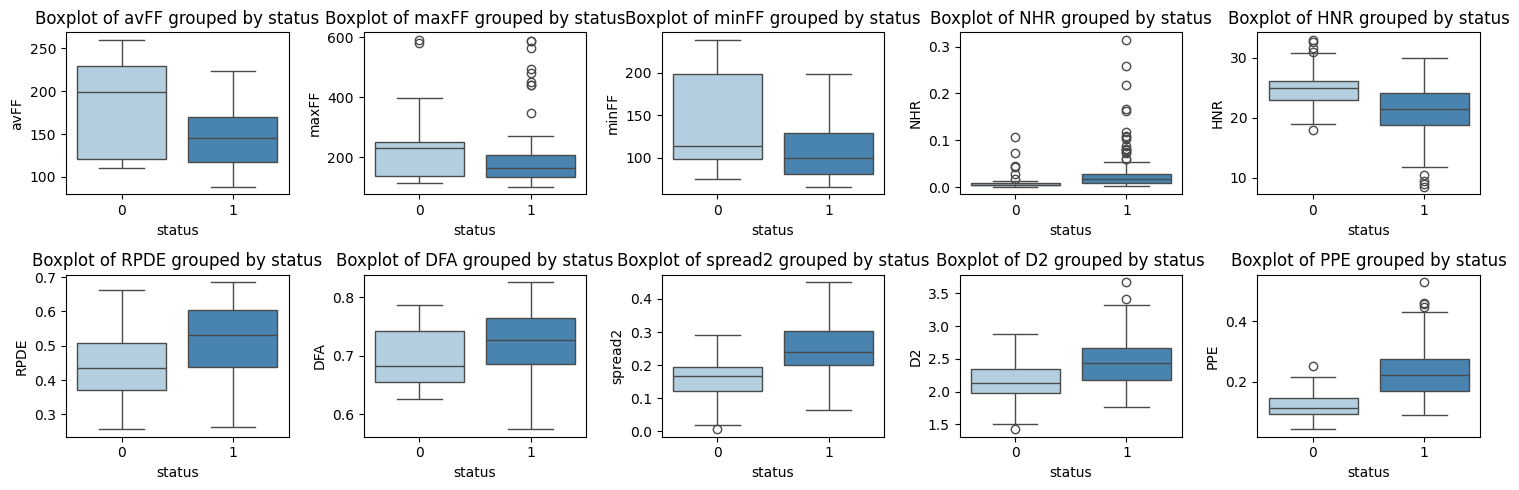

In [99]:
dfff = dff.drop(columns = ['name']) # Removing the name column
status_column = dfff.pop('status')  # Rearrange the status column
dfff.insert(0, 'status', status_column)

num_columns = int((dfff.shape[1]-1) / 2)  # Minus 1 to not count the 'status' column
# Create the image subplots
fig, axes = plt.subplots(nrows=2, ncols=num_columns, figsize=(15, 5))

my_pal = {"0": "firebrick", "1": "burlywood"}

# Loop through each column (excluding 'status') and create a boxplot on each subplot
for i, column in enumerate(dfff.columns[1:]):
    sns.boxplot(x='status', y=column, data=dfff, ax=axes[i // num_columns, i % num_columns], palette='Blues', legend=False, hue='status')
    axes[i // num_columns, i % num_columns].set_title(f'Boxplot of {column} grouped by status')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

To study more in depth the possible differences between healthy and unhealthy groups, let's do a Principal Components Analysis. First, data is going to be standardized, and then PCA will be executed to obtain a new dimensional space from which to check the variance explained by the space-confirming (principal) components.

In [33]:
dfff.head()

,status,avFF,maxFF,minFF,NHR,HNR,RPDE,DFA,spread2,D2,PPE
0,1,119.992,157.302,74.997,0.02211,21.033,0.414783,0.815285,0.266482,2.301442,0.284654
1,1,122.400,148.650,113.819,0.01929,19.085,0.458359,0.819521,0.335590,2.486855,0.368674
2,1,116.682,131.111,111.555,0.01309,20.651,0.429895,0.825288,0.311173,2.342259,0.332634
3,1,116.676,137.871,111.366,0.01353,20.644,0.434969,0.819235,0.334147,2.405554,0.368975
4,1,116.014,141.781,110.655,0.01767,19.649,0.417356,0.823484,0.234513,2.332180,0.410335


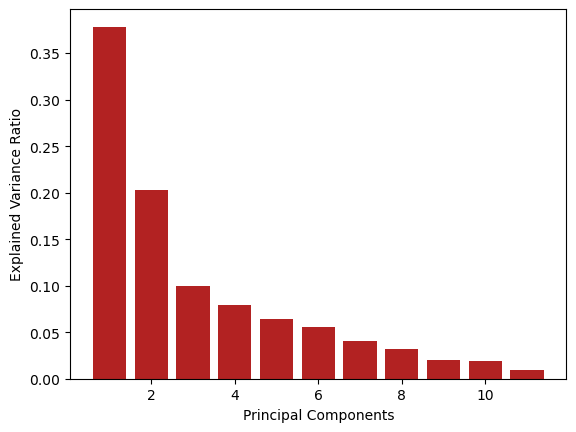

In [85]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dfff)

# Perform PCA
pca = PCA()
pca_result = pca.fit_transform(scaled_data)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plotting the explained variance
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, color='firebrick')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

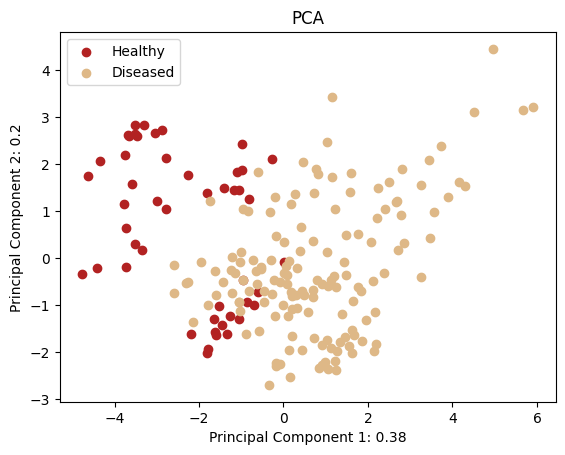

In [96]:
# Create a DataFrame with the principal components
pc_df = pd.DataFrame(data=pca_result[:,:2], columns=['PC1', 'PC2'])
pc_df.insert(0, 'status', status_column)
pc_df['status'] = pc_df['status'].astype('category')

healthy = pc_df[pc_df['status'] == '0']
parkinson_disease = pc_df[pc_df['status'] == '1']

plt.scatter(healthy['PC1'], healthy['PC2'], label='Healthy', c='firebrick')
plt.scatter(parkinson_disease['PC1'], parkinson_disease['PC2'], label='Diseased', c='burlywood')

plt.xlabel(f'Principal Component 1: {round(explained_variance_ratio[0],2)}')
plt.ylabel(f'Principal Component 2: {round(explained_variance_ratio[1],2)}')
plt.title('PCA')
plt.legend()
plt.show()

*With all the information above, we can conclude that...*

- Total observations: 195
    - Healthy: 48
    - Diseased: 147
- Differences among groups...
    - There are some apparent differences among groups means, ranges, and standard deviations, as noticed through the boxplots.
    - The number of outliers is relatively low, apart from the NHR case, as can be also appreciated in the boxplots. Since these don't seem to have a meaningful impact on the differentiation of the groups, no actions will be required against them.
    - Thanks to the PCA, we see that a discretization between the two groups is possible, there exists an overall intrinsic difference among them, most noticebly with the first principal component or x axis. On the other hand, the second principal componet doesn't provide very evident differences among the two groups, although it could be argued that a slight separation is found, with the healthy group on the top and the diseased one in the bottom of the axis.

----------------------------------------------------------------

### TASK 3

##### HEADING
*Using the function group_and_average, create a dataframe for aggregating each variable of the cleaned_dataframe across trials for each subject. The resulting dataframe should consist on 32 observations, one for each subject.*